In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv(r"C:\Users\parvathi\Desktop\ML\Ml notes\Bank_Personal_Loan.csv")
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0
3,4,35,9,100,94112,1,2.7,2,0,0
4,5,35,8,45,91330,4,1.0,2,0,0
5,6,37,13,29,92121,4,0.4,2,155,0
6,7,53,27,72,91711,2,1.5,2,0,0
7,8,50,24,22,93943,1,0.3,3,0,0
8,9,35,10,81,90089,3,0.6,2,104,0
9,10,34,9,180,93023,1,8.9,3,0,1


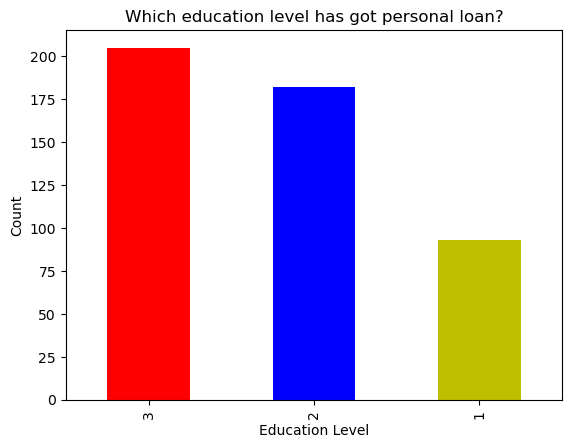

In [22]:
loan_1_data = data[data['Personal Loan'] == 1]
loan_1_education_counts = loan_1_data['Education'].value_counts()

loan_1_education_counts.plot(kind='bar', color=['r','b','y'])
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Which education level has got personal loan?')
plt.show()

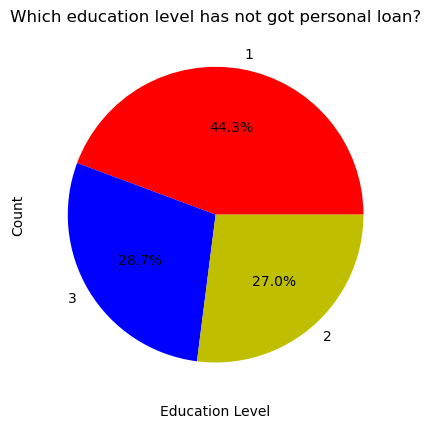

In [23]:
loan_1_data = data[data['Personal Loan'] == 0]
loan_1_education_counts = loan_1_data['Education'].value_counts()

loan_1_education_counts.plot(kind='pie', colors=['r','b','y'], autopct='%1.1f%%')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Which education level has not got personal loan?')
plt.show()

In [24]:
X = data[['Age','Income','Education']]
print(X.head(10))
print(X.shape)

   Age  Income  Education
0   25      49          1
1   45      34          1
2   39      11          1
3   35     100          2
4   35      45          2
5   37      29          2
6   53      72          2
7   50      22          3
8   35      81          2
9   34     180          3
(5000, 3)


In [25]:
y = data['Personal Loan']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal Loan, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=1)
print("-----Before preprocessing ------\n")
print(X_train[:5])
print(X_train.shape)

-----Before preprocessing ------

      Age  Income  Education
3818   26     102          3
1929   44      30          3
2861   42      60          3
4519   45      32          1
4884   60      50          3
(4250, 3)


In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print("-------After preprocessing--------\n")
print(X_train[:5])

-------After preprocessing--------

[[-1.69019233  0.61191136  1.33768489]
 [-0.11961058 -0.94595704  1.33768489]
 [-0.29411966 -0.29684521  1.33768489]
 [-0.03235604 -0.90268292 -1.04953358]
 [ 1.27646209 -0.51321582  1.33768489]]


In [28]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
#Entropy
model_entropy = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
model_entropy.fit(X_train,y_train)
y_pre_entropy = model_entropy.predict(X_test)
print("confusion matrix:\n", confusion_matrix(y_test, y_pre_entropy))
print("\n\nClassification Report:\n", classification_report(y_test,y_pre_entropy))
entropy_score = accuracy_score(y_test, y_pre_entropy)*100
print("\n\nAccuracy Score of Entropy", entropy_score)

confusion matrix:
 [[666   6]
 [ 33  45]]


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       672
           1       0.88      0.58      0.70        78

    accuracy                           0.95       750
   macro avg       0.92      0.78      0.83       750
weighted avg       0.95      0.95      0.94       750



Accuracy Score of Entropy 94.8


In [30]:
#GINI
model_gini = RandomForestClassifier(n_estimators=10,criterion='gini',random_state=1)
model_gini.fit(X_train,y_train)
y_pre_gini = model_gini.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pre_gini))
print("\n\nClassification Report:\n", classification_report(y_test,y_pre_gini))
gini_score = accuracy_score(y_test, y_pre_gini)*100
print("\n\nAccuracy Score of GINI", gini_score)

Confusion matrix:
 [[667   5]
 [ 33  45]]


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       672
           1       0.90      0.58      0.70        78

    accuracy                           0.95       750
   macro avg       0.93      0.78      0.84       750
weighted avg       0.95      0.95      0.94       750



Accuracy Score of GINI 94.93333333333334


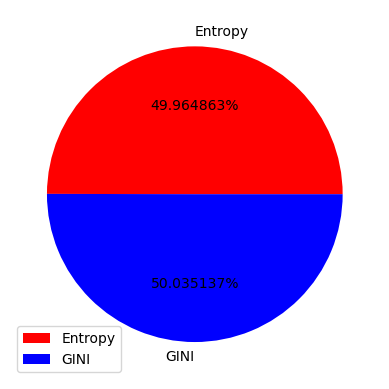

In [31]:
label = ['Entropy','GINI']
count = [entropy_score, gini_score]
plt.pie(count, labels=label, autopct='%f%%', startangle=0, colors=['r','b'])
plt.legend()
plt.show()

In [32]:
user_data = pd.DataFrame([[34,180,3]], columns=['Age', 'Income', 'Education'])

user_data_scaled = ss.transform(user_data)

result = model_gini.predict(user_data_scaled)
print(f'The result is: {result}')


The result is: [1]


In [33]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [36]:
y_pre = knn.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pre))
print("\n\nClassification Report:\n", classification_report(y_test,y_pre))
knn_score = accuracy_score(y_test, y_pre)*100
print("\n\nAccuracy Score of KNN", knn_score)

Confusion matrix:
 [[670   2]
 [ 32  46]]


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       672
           1       0.96      0.59      0.73        78

    accuracy                           0.95       750
   macro avg       0.96      0.79      0.85       750
weighted avg       0.95      0.95      0.95       750



Accuracy Score of KNN 95.46666666666667


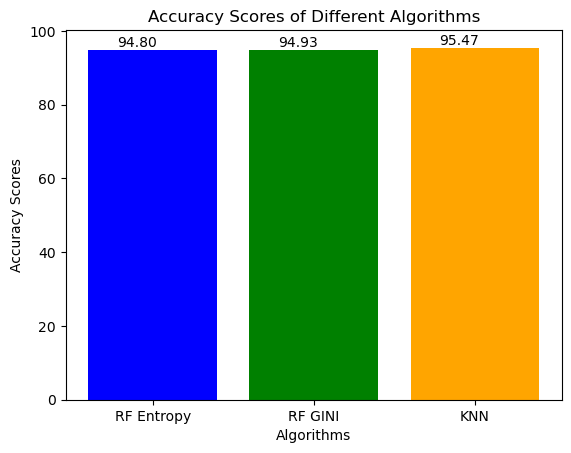

In [43]:
algorithms=['RF Entropy', 'RF GINI', 'KNN']
accuracy_scores=[entropy_score, gini_score, knn_score]
bars=plt.bar(algorithms, accuracy_scores, color=['blue', 'green','orange'])
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of Different Algorithms')
plt.show()